In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os
import csv
%matplotlib inline

In [17]:
VAL_PATH = "data/images/val/"
# val_names = os.listdir(VAL_PATH)
# len(val_names), val_names

In [40]:
# category names
cat_num_to_name = {}

CATEGORIES_PATH = "development_kit/data/categories.txt"
with open(CATEGORIES_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        cat_num_to_name[int(row[1])] = row[0]

cat_num_to_name

{0: '/a/abbey',
 1: '/a/airport_terminal',
 2: '/a/amphitheater',
 3: '/a/amusement_park',
 4: '/a/aquarium',
 5: '/a/aqueduct',
 6: '/a/art_gallery',
 7: '/a/assembly_line',
 8: '/a/auditorium',
 9: '/b/badlands',
 10: '/b/bakery/shop',
 11: '/b/ballroom',
 12: '/b/bamboo_forest',
 13: '/b/banquet_hall',
 14: '/b/bar',
 15: '/b/baseball_field',
 16: '/b/bathroom',
 17: '/b/beauty_salon',
 18: '/b/bedroom',
 19: '/b/boat_deck',
 20: '/b/bookstore',
 21: '/b/botanical_garden',
 22: '/b/bowling_alley',
 23: '/b/boxing_ring',
 24: '/b/bridge',
 25: '/b/bus_interior',
 26: '/b/butchers_shop',
 27: '/c/campsite',
 28: '/c/candy_store',
 29: '/c/canyon',
 30: '/c/cemetery',
 31: '/c/chalet',
 32: '/c/church/outdoor',
 33: '/c/classroom',
 34: '/c/clothing_store',
 35: '/c/coast',
 36: '/c/cockpit',
 37: '/c/coffee_shop',
 38: '/c/conference_room',
 39: '/c/construction_site',
 40: '/c/corn_field',
 41: '/c/corridor',
 42: '/c/courtyard',
 43: '/d/dam',
 44: '/d/desert/sand',
 45: '/d/dining_

In [29]:
filename_to_category = {}
# val_labels = []

# use csv reader to construct dictionary between filenames and category.
VAL_LABEL_PATH = "development_kit/data/val-mine.txt"
with open(VAL_LABEL_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        filename_to_category[row[0]] = int(row[1])
#         val_labels.append(int(row[1]))
        
filename_to_category

{'00006551.jpg': 32,
 '00009023.jpg': 48,
 '00005402.jpg': 33,
 '00000493.jpg': 43,
 '00000718.jpg': 30,
 '00009570.jpg': 55,
 '00000257.jpg': 3,
 '00007860.jpg': 24,
 '00009024.jpg': 66,
 '00008049.jpg': 15,
 '00000066.jpg': 28,
 '00008117.jpg': 59,
 '00006182.jpg': 91,
 '00005479.jpg': 88,
 '00008761.jpg': 88,
 '00001016.jpg': 86,
 '00006563.jpg': 37,
 '00003565.jpg': 61,
 '00001351.jpg': 35,
 '00009178.jpg': 81,
 '00006410.jpg': 92,
 '00006155.jpg': 51,
 '00007374.jpg': 12,
 '00000133.jpg': 25,
 '00000402.jpg': 12,
 '00002121.jpg': 71,
 '00007189.jpg': 37,
 '00007897.jpg': 48,
 '00001617.jpg': 13,
 '00000752.jpg': 33,
 '00002276.jpg': 23,
 '00000295.jpg': 36,
 '00000207.jpg': 55,
 '00009317.jpg': 57,
 '00003347.jpg': 95,
 '00007613.jpg': 28,
 '00000522.jpg': 26,
 '00009603.jpg': 26,
 '00007828.jpg': 89,
 '00006178.jpg': 15,
 '00007788.jpg': 12,
 '00003730.jpg': 81,
 '00007797.jpg': 52,
 '00005432.jpg': 79,
 '00003262.jpg': 97,
 '00003574.jpg': 29,
 '00005632.jpg': 54,
 '00009152.jpg

In [5]:
def show(path, img_name):
    img_path = path + img_name
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cat_num_to_name[filename_to_category[img_name]])
    print(filename_to_category[img_name])

88


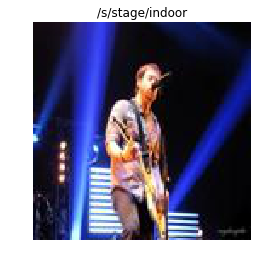

In [23]:
fname = '00000011.jpg'
category = filename_to_category[fname]
show(VAL_PATH, fname)

# Make Model

In [24]:
# Keras Imports
from keras.layers import Activation, Reshape, Dropout, Dense,Flatten
from keras.layers import AtrousConvolution2D, Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2DTranspose
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
import keras.preprocessing.image as kimage
import keras.backend
keras.backend.set_image_data_format('channels_last')

Using TensorFlow backend.


In [60]:
def makemodel():
    model = Sequential()
    model.add(Convolution2D(filters=128,kernel_size=(3, 3), input_shape=(128,128,3), padding='same'))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Convolution2D(kernel_size = (3,3), filters = 128, padding='same'))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    #model.add(Flatten())
    model.add(Convolution2D(filters=64, kernel_size=(1,1)))
    model.add(Dropout(rate= 0.5))
    model.add(Flatten())
    model.add(Dense(units=1000))
    model.add(Dense(units=1000))
    model.add(Dense(units=100))
    #model.add(Reshape((-1,10)))
    model.add(Activation('softmax'))
    return model

model = makemodel()

print(model.summary())

# compile the model with crossentropy loss function.
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 128)     3584      
_________________________________________________________________
activation_13 (Activation)   (None, 128, 128, 128)     0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 128)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        8256      
__________

# Put Data into np arrays

In [31]:
def make_one_hot(label):
    a = [0] * 100
    a[label] = 1
    return np.array(a)

In [30]:
all_vals = []
labels = []

for filename, label in filename_to_category.items():
    img_path = VAL_PATH + filename
    all_vals.append(mpimg.imread(img_path))
    labels.append(make_one_hot(label))

all_vals = np.array(all_vals)
labels = np.array(labels)

59


'/k/kindergarden_classroom'

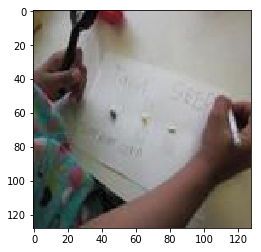

In [50]:
import random
idx = random.randint(0,99)
print(idx)
plt.imshow(all_vals[idx])
cat_num_to_name[np.argmax(labels[idx])]

# Train the model

In [63]:
model.fit(all_vals, labels, epochs=10, batch_size=64)

Epoch 1/10
10000/10000 [==============================] - 28s - loss: 15.9569 - acc: 0.0100     

In [ ]:
import h5py

In [ ]:
model.save('my_model.h5')

In [59]:
result = model.evaluate(all_vals, labels, batch_size=128)
print("Loss on valid set:"  + str(result[0]) + " Accuracy on valid set: " + str(result[1]))

 9984/10000 [============================>.] - ETA: 0s 